## Random Forest Method for Probability Regression 
20th march 2020 prediction

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("Train_dataset.csv")
dfq = pd.read_csv("Test_dataset.csv", encoding = "latin1")

X = df.iloc[:, [2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
XT = dfq.iloc[:, [2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
#X = df.iloc[:, 1:-1]
y = df.iloc[: , -1]
pd.DataFrame(X).fillna(X.mean(), inplace=True)
pd.DataFrame(XT).fillna(XT.mean(), inplace=True)

W = ['cardiological_pressure','Pulmonary_score', 'comorbidity', 'Mode_transport', 'Occupation', 'Married', 'Gender']
B=pd.get_dummies(X[W],drop_first=False)
C=pd.get_dummies(XT[W],drop_first=False)

# Drop the state coulmn                                   
X=X.drop(W,axis=1)
XT=XT.drop(W,axis=1)
# concat the dummy variables
X=pd.concat([X,B],axis=1)
XT=pd.concat([XT,C],axis=1)
#X = np.append(arr = np.ones((X.shape[0],1)), values = X, axis = 1)
X_train, X_test, y_train = X, XT, y


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

regressor = RandomForestRegressor(n_estimators=73, random_state=20)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

y_pr = pd.Series(y_pred)
R = pd.concat([dfq, y_pr], axis=1)
#pd.DataFrame(R).fillna(R.mean(), inplace=True)
T = R.iloc[:, [0, 27]]

from sklearn import metrics

#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print(r2_score(y_test, y_pred))

In [47]:
#Creation of csv file to store predicted data of infected probability.

T.to_csv(r'Task1.csv', index = False)

## Linear Regressor Model for Prediction
on 20th march 2020

Mean Absolute Error: 4.577761116544134
Accuracy: 91.5 %.
Mean Squared Error: 82.05852117793673
Root Mean Squared Error: 9.058615853315379
0.29372994252754625


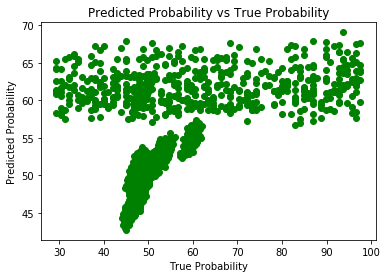

In [19]:
df = pd.read_csv("Train_dataset.csv")
dfq = pd.read_csv("Test_dataset.csv", encoding = "latin1")

X = df.iloc[:, [2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
XT = dfq.iloc[:, [2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
#X = df.iloc[:, 1:-1]
y = df.iloc[: , -1]
pd.DataFrame(X).fillna(X.mean(), inplace=True)
pd.DataFrame(XT).fillna(XT.mean(), inplace=True)

W = ['cardiological_pressure','Pulmonary_score', 'comorbidity', 'Mode_transport', 'Occupation', 'Married', 'Gender']
B=pd.get_dummies(X[W],drop_first=False)
C=pd.get_dummies(XT[W],drop_first=False)

# Drop the state coulmn                                   
X=X.drop(W,axis=1)
XT=XT.drop(W,axis=1)
# concat the dummy variables
X=pd.concat([X,B],axis=1)
XT=pd.concat([XT,C],axis=1)

X = np.append(arr = np.ones((X.shape[0],1)), values = X, axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, c ='g')
plt.xlabel('True Probability')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probability vs True Probability')
plt.show()

## Importace of Every Feature used in Model

[0.05753603503998171, 0.03512121628856112, 0.02359440373013575, 0.26635808678586714, 0.03351611069117141, 0.05722904008329038, 0.05502144646891242, 0.05964344427050447, 0.05757922941296466, 0.04659797525052315, 0.0405546363888018, 0.04485895554492457, 0.019547940479913366, 0.03835726273472295, 0.03853352917129784, 0.013347509112531804, 0.002919686675562771, 0.0036666682586764367, 0.00418470027117035, 0.004025972186261576, 0.003354211633995762, 0.0031272697334918443, 0.002993981834833575, 0.002756471534551453, 0.005607928613547609, 0.005879456238434815, 0.004715965795816871, 0.004246621067199072, 0.006438923110729743, 0.004961344065511959, 0.005704324988388696, 0.0031133305411184466, 0.00397191567880203, 0.0034260246713886566, 0.0035859547877053416, 0.006558158991780235, 0.0029521253495255594, 0.004764478633887209, 0.0033694525627796885, 0.003922021875103791, 0.0024483547819259687, 0.001258100522505412, 0.003818722257110887, 0.004831011884089531]


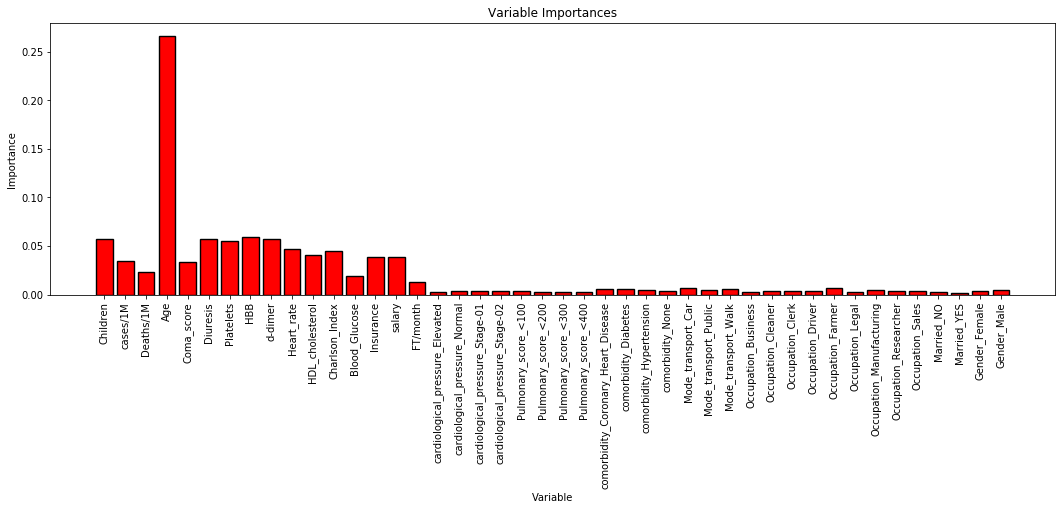

In [85]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
print(importances)
# List of tuples with variable and importance
feature_list = list(X.columns)

feature_importances = [(X, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
#for pair in feature_importances:
#    print('Variable: {:20} Importance'.format(*pair))
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
f, ax = plt.subplots(figsize=(18,5))
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.4)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Plotting of Diuresis Time_sereis Data

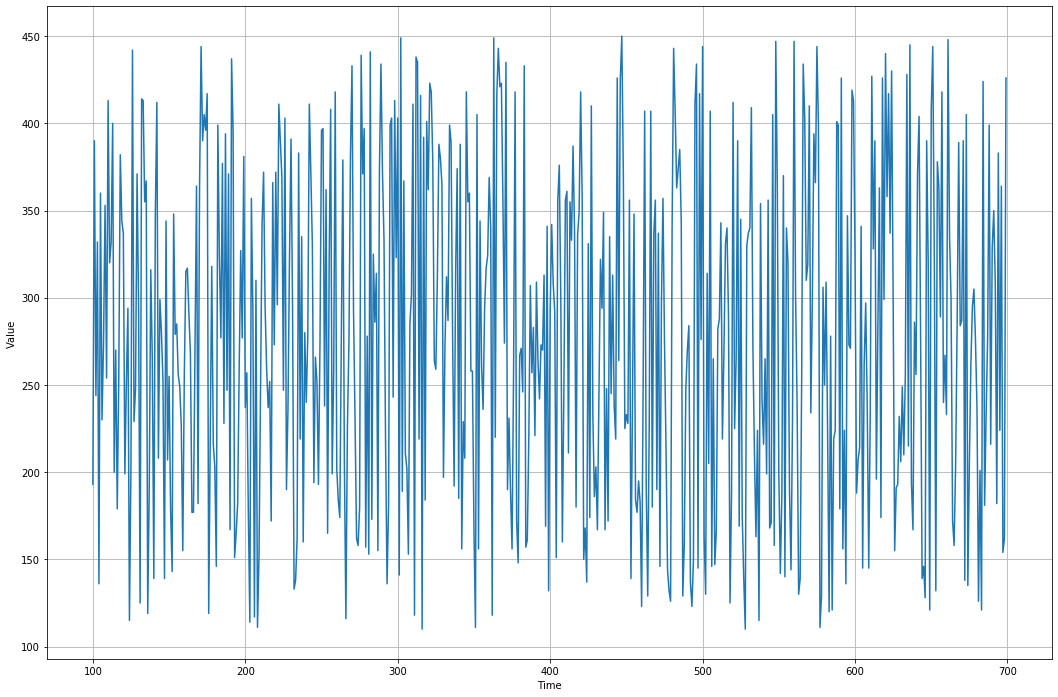

In [16]:
time_step = []
temps = []
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
q = pd.read_csv("Diuresis_TR.csv")
step=0
for i in range(1,8):
    for j in range(10714):
        temps.append(float(q.iloc[j, i]))
        time_step.append(step)
        step = step + 1

series = np.array(temps)
time = np.array(time_step)


plt.figure(figsize=(18, 12))
plot_series(time[100:700], series[100:700])

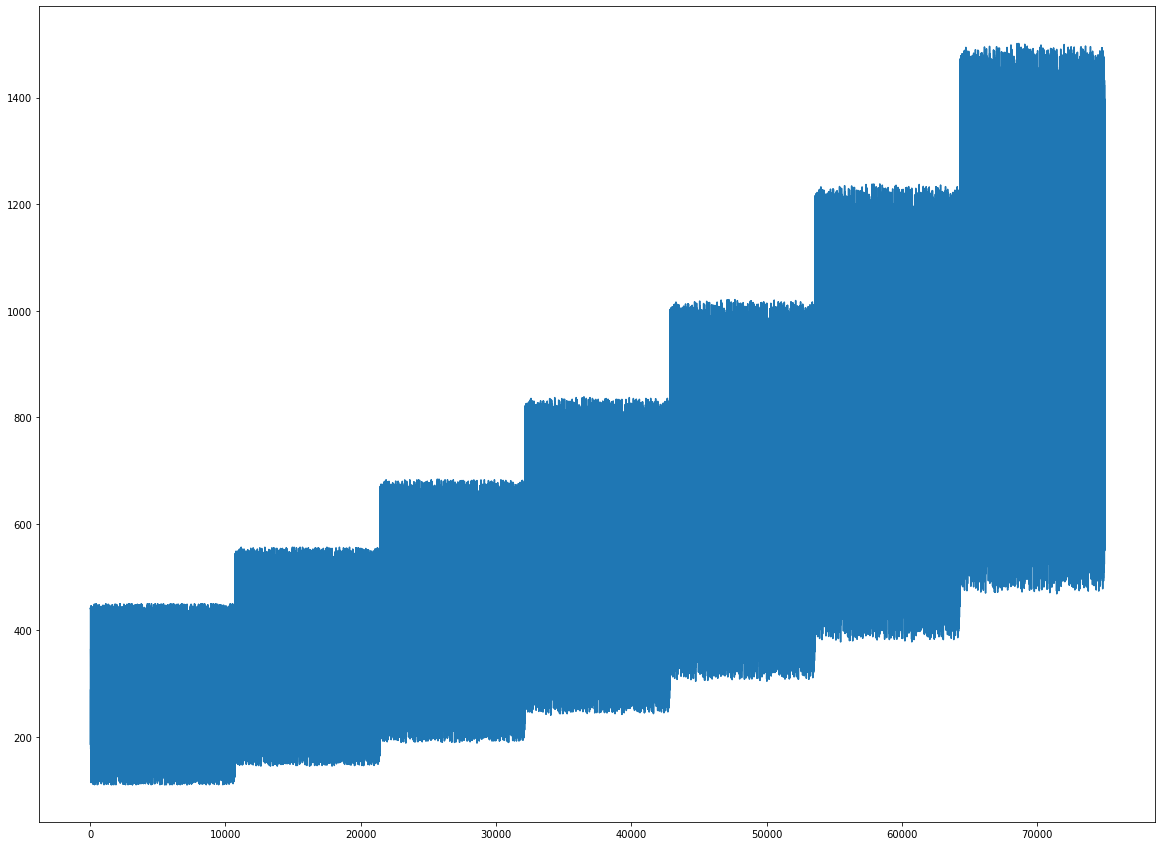

In [15]:
plt.figure(figsize=(20, 15))
#Only 600 entries taken for better result
plt.plot(time[:], series[:])